The objective of this section is to carry out some data cleaning procedures on the previously collected text and record data. The datasets used here are the text data collected from News API and the record data collected from Rapid API and Cars API. 

# Cleaning Text Data

### Importing the required python packages:

In [81]:
API_KEY='481b1e4a75874d2f9a23e3329031364c'

In [82]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

### Topic : Electric Vehicles


A quick overview into the intial shape of the json returned from the api call

In [83]:
baseURL = "https://newsapi.org/v2/everything?"
total_requests=2
verbose=True

# THIS CODE WILL NOT WORK UNLESS YOU INSERT YOUR API KEY IN THE NEXT LINE
API_KEY='481b1e4a75874d2f9a23e3329031364c'
TOPIC1='electric vehicles'

### Form URL and save result

In [84]:
URLpost = {'apiKey': API_KEY,
            'q': '+'+TOPIC1,
            'sortBy': 'relevancy',
            'totalRequests': 1}

print(baseURL)
# print(URLpost)

#GET DATA FROM API
response = requests.get(baseURL, URLpost) #request data from the server
# print(response.url);  
response = response.json() #extract txt data from request into json

# PRETTY PRINT
# https://www.digitalocean.com/community/tutorials/python-pretty-print-json

# print(json.dumps(response, indent=2));
print(json.dumps(response['articles'][:5], indent=2))
 

# #GET TIMESTAMP FOR PULL REQUEST
from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d-H%H-M%M-S%S")

# SAVE TO FILE 
with open(timestamp+'-newapi-raw-data.json', 'w') as outfile:
    json.dump(response, outfile, indent=4);

https://newsapi.org/v2/everything?
[
  {
    "source": {
      "id": "engadget",
      "name": "Engadget"
    },
    "author": "Kris Holt",
    "title": "Lucid EVs will be able to access Tesla's Superchargers starting in 2025",
    "description": "Lucid's electric vehicles will be able to plug into over 15,000 Tesla Superchargers in North America starting in 2025. The automaker is the latest entry in the growing list of companies pledging to support the North American Charging Standard (NACS), also kno\u2026",
    "url": "https://www.engadget.com/lucid-evs-will-be-able-to-access-teslas-superchargers-starting-in-2025-055045292.html",
    "urlToImage": "https://s.yimg.com/ny/api/res/1.2/cLamIJynTVqTuxElMIvb0g--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD04MDA-/https://s.yimg.com/os/creatr-uploaded-images/2023-11/52b603b0-7d2b-11ee-9eff-5b10c26861ec",
    "publishedAt": "2023-11-07T05:50:45Z",
    "content": "Lucid's electric vehicles will be able to plug into over 15,000 Tesla Superchargers in No

### Utility function
- Function to clean strings

In [85]:
def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

### Clean JSON
- clean data and make a list of lists

In [86]:
import json
import re

# Assuming `response` is your JSON response containing the articles
article_list = response['articles']  # list of dictionaries for each article
article_keys = article_list[0].keys()
print("AVAILABLE KEYS:")
print(article_keys)

# Set how many articles to preview
number_of_articles_to_preview = 5  # Adjust as needed
verbose = True  # Set to False to suppress verbose output

def string_cleaner(input_string):
    # Define your string cleaning function here
    return input_string

electric_vehicle_cleaned_data = []

for index, article in enumerate(article_list):
    tmp = []

    # Print a preview for a limited number of articles
    if index < number_of_articles_to_preview and verbose:
        print(f"Article #{index} Preview:")
        print(f"Title: {article.get('title', 'No Title')}")
        # Add any other key information you want in the preview
        print("------------------------------------------")

    for key in article_keys:
        if key == 'source':
            src = string_cleaner(article[key]['name'])
            tmp.append(src)

        if key == 'author':
            author = string_cleaner(article[key]) if article[key] else 'NA'  # Ensure author is not None
            # ERROR CHECK (SOMETIMES AUTHOR IS SAME AS PUBLICATION)
            if author != 'NA' and src in author: 
                print("AUTHOR ERROR:", author)
                author = 'NA'
            tmp.append(author)

        if key == 'title':
            tmp.append(string_cleaner(article[key]))

        if key == 'description':
            tmp.append(string_cleaner(article[key]))

        if key == 'content':
            tmp.append(string_cleaner(article[key]))

        if key == 'publishedAt':
            # DEFINE DATA PATTERN FOR RE TO CHECK
            ref = re.compile('.*-.*-.*T.*:.*:.*Z')
            date = article[key]
            if not ref.match(date):
                print("DATE ERROR:", date)
                date = "NA"
            tmp.append(date)

    electric_vehicle_cleaned_data.append(tmp)

AVAILABLE KEYS:
dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
Article #0 Preview:
Title: Lucid EVs will be able to access Tesla's Superchargers starting in 2025
------------------------------------------
Article #1 Preview:
Title: Revel is shutting down its shared electric moped service
------------------------------------------
Article #2 Preview:
Title: EVs are way more unreliable than gas-powered cars, Consumer Reports data indicates
------------------------------------------
Article #3 Preview:
Title: Black Friday Deals on Electric Bikes (2023): Rad and Aventon
------------------------------------------
Article #4 Preview:
Title: Tesla Cybertruck will usher in a new ‘Powershare’ bidirectional charging feature
------------------------------------------


### Convert to Dataframe

In [87]:
df = pd.DataFrame(electric_vehicle_cleaned_data)
print(df)
df.to_csv('electric_vehicle_cleaned.csv', index=False) 
index_label=['title','src','author','date','description']

                          0                         1  \
0                  Engadget                 Kris Holt   
1                  Engadget             Mariella Moon   
2                  Engadget             Will Shanklin   
3                     Wired               Adrienne So   
4                 The Verge         Andrew J. Hawkins   
..                      ...                       ...   
95                 Autoblog                 Bloomberg   
96  Futurity: Research News  Jim Erickson-U. Michigan   
97               Core77.com                  Rain Noe   
98           Digital Trends       Christian de Looper   
99             The Next Web            Linnea Ahlgren   

                                                    2  \
0   Lucid EVs will be able to access Tesla's Super...   
1   Revel is shutting down its shared electric mop...   
2   EVs are way more unreliable than gas-powered c...   
3   Black Friday Deals on Electric Bikes (2023): R...   
4   Tesla Cybertruck will ushe

In [88]:
electric_vehicle_df = pd.read_csv("electric_vehicle_cleaned.csv")
rename_map = {
    '0': 'title',
    '2': 'description'
}

electric_vehicle_df.rename(columns=rename_map, inplace=True)

In [89]:
cols_to_keep = rename_map.values()
electric_vehicle_df = electric_vehicle_df[cols_to_keep]

In [90]:
electric_vehicle_df

,title,description
0,Engadget,Lucid EVs will be able to access Tesla's Super...
1,Engadget,Revel is shutting down its shared electric mop...
2,Engadget,EVs are way more unreliable than gas-powered c...
3,Wired,Black Friday Deals on Electric Bikes (2023): R...
4,The Verge,Tesla Cybertruck will usher in a new ‘Powersha...
...,...,...
95,Autoblog,A surprising player gets into the EV battery g...
96,Futurity: Research News,"To meet emissions goal, decarbonize light-duty..."
97,Core77.com,An Electric Motorcycle Built Around a Cargo Ca...
98,Digital Trends,"Tesla’s EV plug is great, but smoother payment..."


In [91]:
ev_text = str(electric_vehicle_df["description"])

In [92]:
print(ev_text)

0     Lucid EVs will be able to access Tesla's Super...
1     Revel is shutting down its shared electric mop...
2     EVs are way more unreliable than gas-powered c...
3     Black Friday Deals on Electric Bikes (2023): R...
4     Tesla Cybertruck will usher in a new ‘Powersha...
                            ...                        
95    A surprising player gets into the EV battery g...
96    To meet emissions goal, decarbonize light-duty...
97    An Electric Motorcycle Built Around a Cargo Ca...
98    Tesla’s EV plug is great, but smoother payment...
99    Want engineering superpowers? This GenAI start...
Name: description, Length: 100, dtype: object


# Word Cloud Visualization

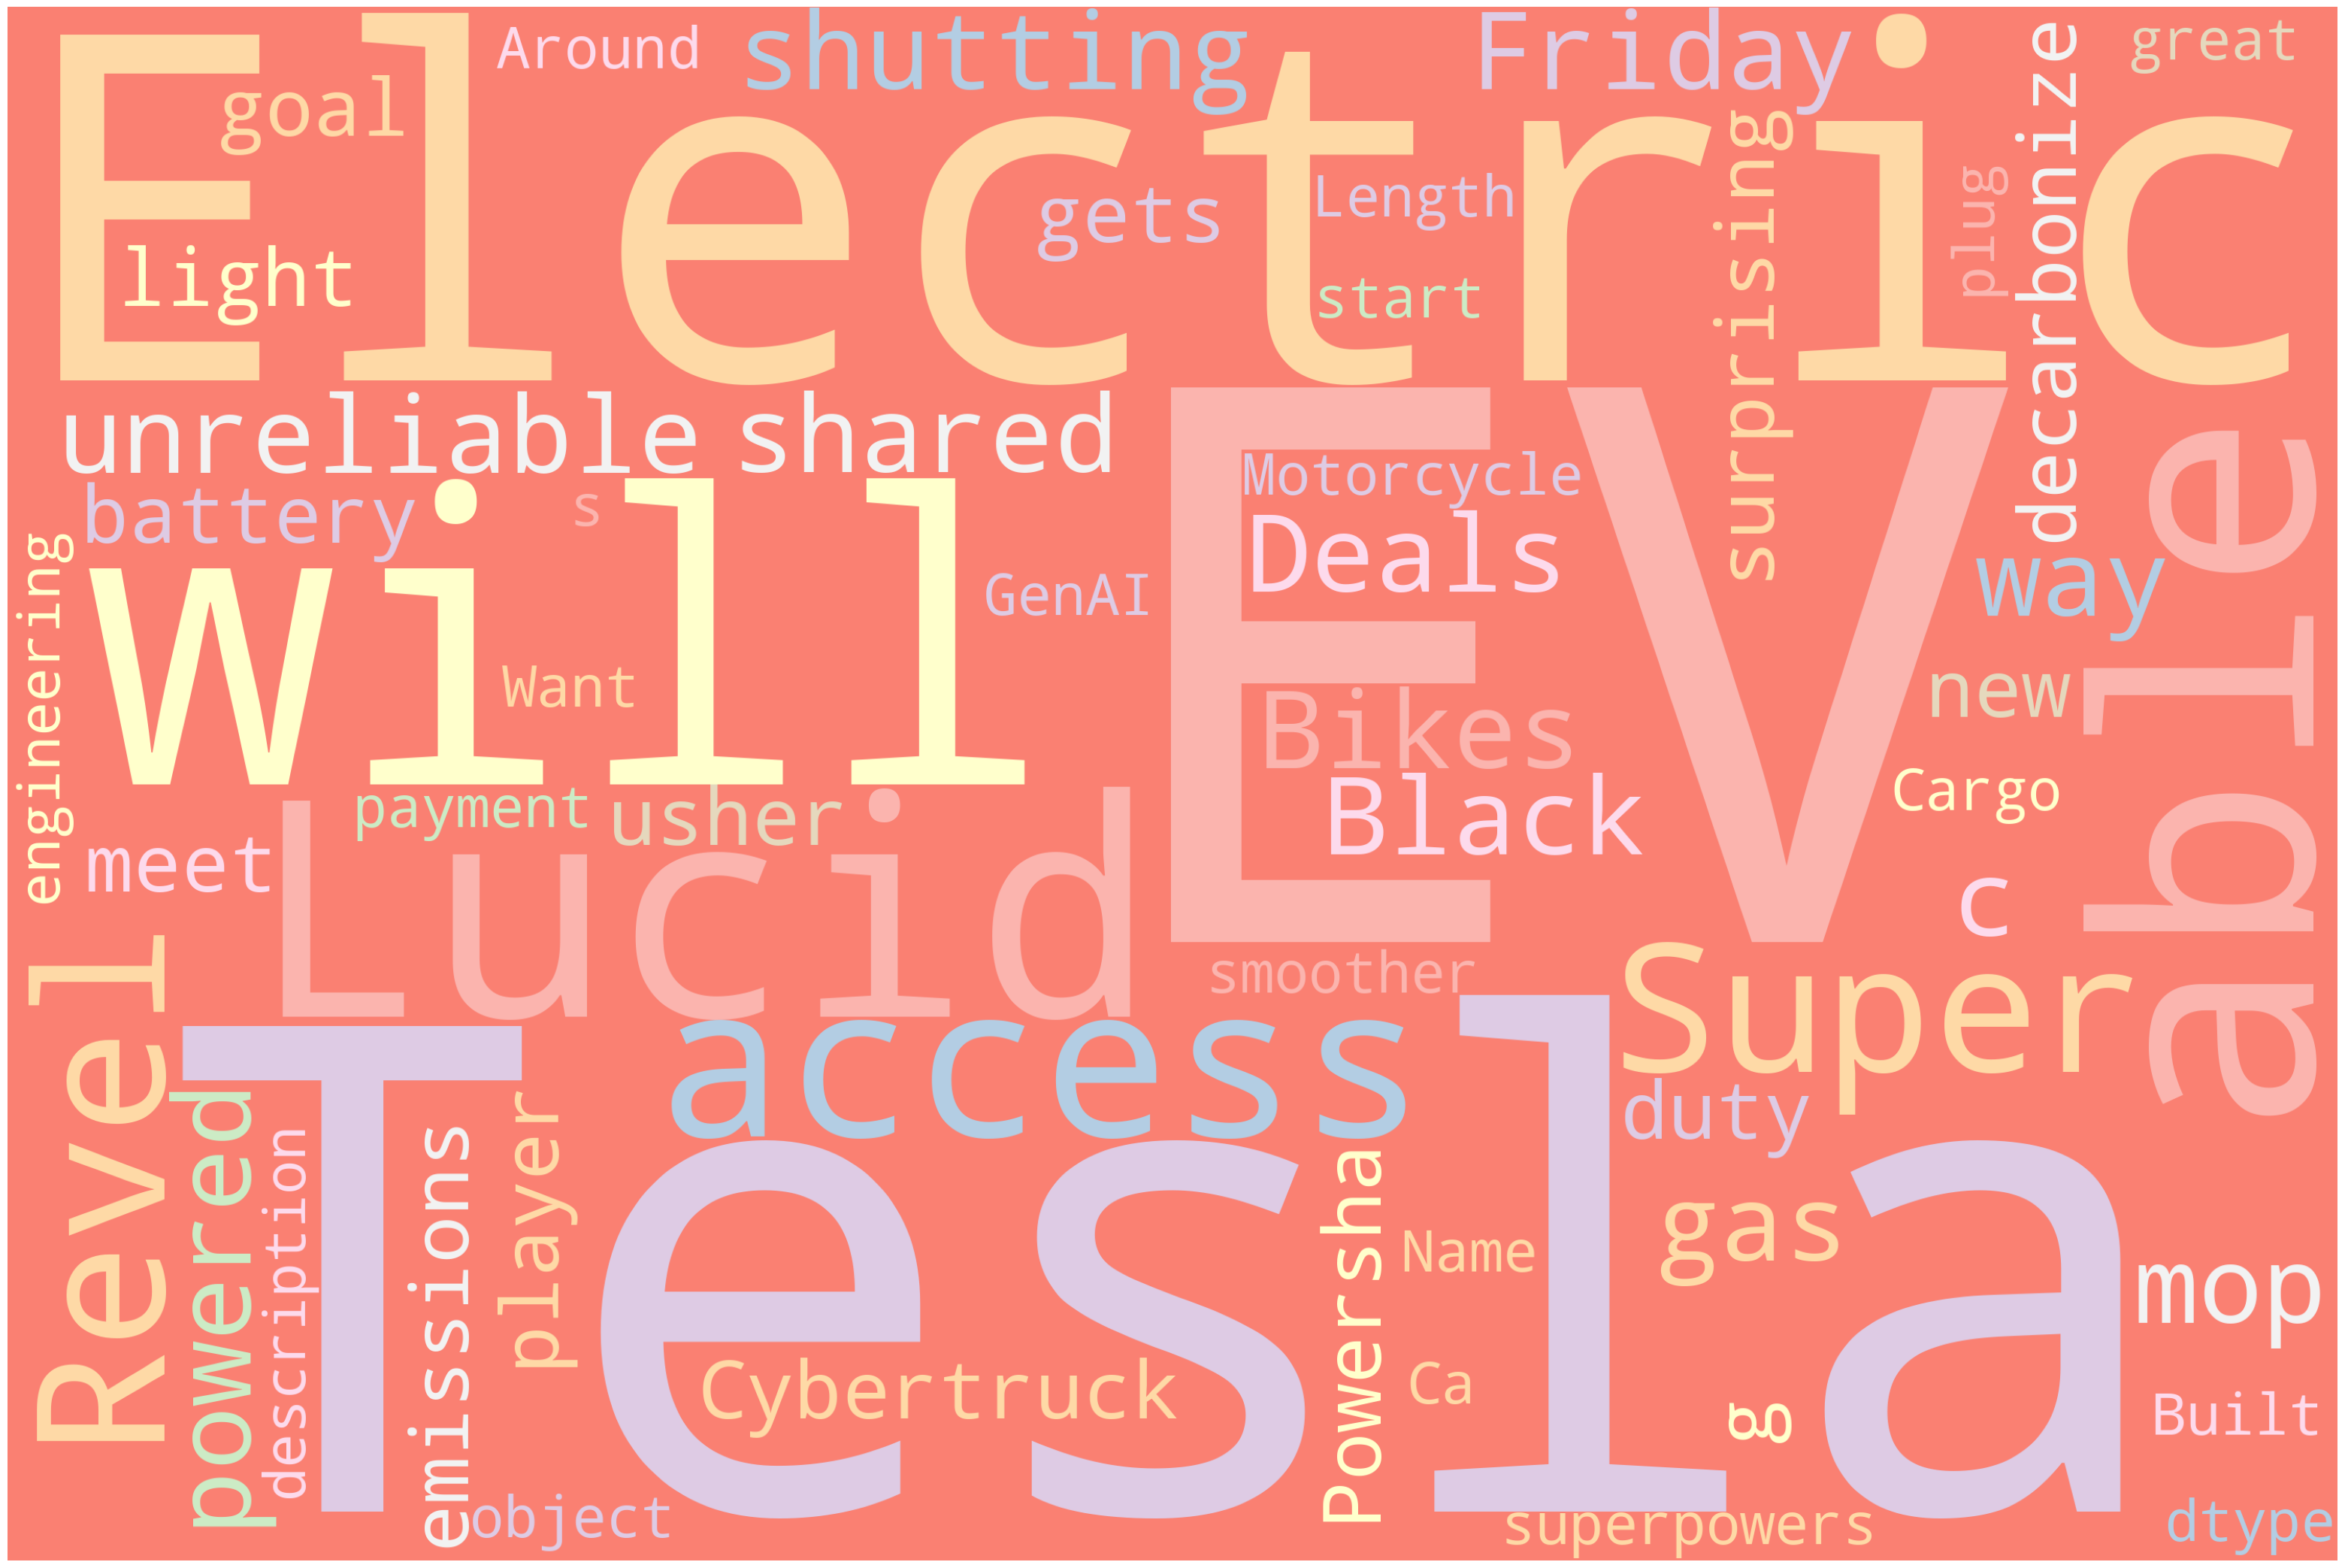

In [93]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

# text='The field of machine learning is typically divided into three fundamental sub-paradigms. These include supervised learning, unsupervised learning, and reinforcement learning (RL). The discipline of reinforcement learning focuses on how intelligent agents learn to perform actions, inside a specified environment, to maximize  a cumulative reward function. Over the past several decades, there has been a push to incorporate concepts from the field of deep-learning into the agents used in RL algorithms. This has spawned the field of Deep reinforcement learning. To date, the field of deep RL has yielded stunning results in a wide range of technological applications. These include, but are not limited to, self-driving cars, autonomous game play, robotics, trading and finance, and Natural Language Processing. This course will begin with an introduction to the fundamentals of traditional, i.e. non-deep, reinforcement learning. After reviewing fundamental deep learning topics the course will transition to deep RL by incorporating artificial neural networks into the models. Topics include Markov Decision Processes, Multi-armed Bandits, Monte Carlo Methods, Temporal Difference Learning, Function Approximation, Deep Neural Networks, Actor-Critic, Deep Q-Learning, Policy Gradient Methods, and connections to Psychology and to Neuroscience.'
generate_word_cloud(ev_text)

# Record Data Cleaning

## Data from Rapid API:

With this dataset we carry out the following data cleaning procedures:
- Converting the json file into a dataframe. 
- Clean the column names by renaming them and stripping any whitespaces. 
- Drop unneccessary columns
- Save the dataframe

In [94]:
import json
import pandas as pd

# Load JSON file
with open('output.json', 'r') as f:
    data = json.load(f)

# Create a Pandas DataFrame from the entire JSON data
df = pd.json_normalize(data)

# Renaming columns and stripping any spaces
df.rename(columns=lambda x: x.strip(), inplace=True)
df=df.rename(columns = {'_id':'id'})
df=df.rename(columns = {'VIN (1-10)':'VIN'})

# Drop columns that are not needed:
# df = df.drop(['Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'], axis=1)

# Print the DataFrame
display(df)

# saving the dataframe
df.to_csv('ev-output.csv')


,id,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,64b8150c3f35c83376286f21,1N4AZ0CP5D,Kitsap,Bremerton,WA,98310,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,23,214384901,POINT (-122.61136499999998 47.575195000000065),PUGET SOUND ENERGY INC,53035080400
1,64b8150c3f35c83376286f22,1N4AZ1CP8K,Kitsap,Port Orchard,WA,98366,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,26,271008636,POINT (-122.63926499999997 47.53730000000007),PUGET SOUND ENERGY INC,53035092300
2,64b8150c3f35c83376286f23,5YJXCAE28L,King,Seattle,WA,98199,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,36,8781552,POINT (-122.394185 47.63919500000003),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005600
3,64b8150c3f35c83376286f24,SADHC2S1XK,Thurston,Olympia,WA,98503,2019,JAGUAR,I-PACE,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,234,0,2,8308492,POINT (-122.8285 47.03646),PUGET SOUND ENERGY INC,53067011628
4,64b8150c3f35c83376286f25,JN1AZ0CP9B,Snohomish,Everett,WA,98204,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,21,245524527,POINT (-122.24128499999995 47.91088000000008),PUGET SOUND ENERGY INC,53061041901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64b8150c3f35c83376286f80,1N4AZ0CP8G,King,Bellevue,WA,98006,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,41,35325,POINT (-122.16936999999996 47.571015000000045),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025007
96,64b8150c3f35c83376286f81,5UXKT0C53J,Yakima,Zillah,WA,98953,2018,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,13,0,15,153996167,POINT (-120.26033999999999 46.40493500000008),PACIFICORP,53077002201
97,64b8150c3f35c83376286f82,5YJSA1H23F,Snohomish,Lynnwood,WA,98036,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1,7821215,POINT (-122.31667499999998 47.81936500000006),PUGET SOUND ENERGY INC,53061051929
98,64b8150c3f35c83376286f83,5YJSA1E21J,Skagit,Anacortes,WA,98221,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,40,285304512,POINT (-122.61530499999998 48.50127500000008),PUGET SOUND ENERGY INC,53057940600


## Data from Cars API:

In [95]:
record_data = pd.read_csv('cars-data.csv')

record_data.head()

,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,midsize car,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993
1,1,19,midsize car,22,4.0,2.2,fwd,gas,27,toyota,Camry,m,1993
2,2,16,midsize car,19,6.0,3.0,fwd,gas,22,toyota,Camry,a,1993
3,3,16,midsize car,18,6.0,3.0,fwd,gas,22,toyota,Camry,m,1993
4,4,18,midsize-large station wagon,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993


### Look for NaN values

In [96]:
nan_count = record_data.isna().sum()

print(nan_count)

Unnamed: 0           0
city_mpg             0
class                0
combination_mpg      0
cylinders          124
displacement       124
drive                8
fuel_type            0
highway_mpg          0
make                 0
model                0
transmission         0
year                 0
dtype: int64


### Double check datatypes

In [97]:
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       719 non-null    int64  
 1   city_mpg         719 non-null    int64  
 2   class            719 non-null    object 
 3   combination_mpg  719 non-null    int64  
 4   cylinders        595 non-null    float64
 5   displacement     595 non-null    float64
 6   drive            711 non-null    object 
 7   fuel_type        719 non-null    object 
 8   highway_mpg      719 non-null    int64  
 9   make             719 non-null    object 
 10  model            719 non-null    object 
 11  transmission     719 non-null    object 
 12  year             719 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 73.2+ KB


### Convert to desired datatype

In [98]:
# Convert all 'object' type columns to 'string'
for col in record_data.select_dtypes(include=['object']).columns:
    record_data[col] = record_data[col].astype('string')

# Verify the changes
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       719 non-null    int64  
 1   city_mpg         719 non-null    int64  
 2   class            719 non-null    string 
 3   combination_mpg  719 non-null    int64  
 4   cylinders        595 non-null    float64
 5   displacement     595 non-null    float64
 6   drive            711 non-null    string 
 7   fuel_type        719 non-null    string 
 8   highway_mpg      719 non-null    int64  
 9   make             719 non-null    string 
 10  model            719 non-null    string 
 11  transmission     719 non-null    string 
 12  year             719 non-null    int64  
dtypes: float64(2), int64(5), string(6)
memory usage: 73.2 KB


### Drop unnecessary columns

In [99]:
# Dropping non-numerical and unnecessary columns
record_data = record_data.drop(columns=['Unnamed: 0'])

### Replace NaN values 

In [100]:
# Replace continuous missing values with mean of the column. check for Nan values again.

cols = ['displacement', 'cylinders']
record_data[cols] = record_data[cols].fillna(record_data[cols].mean())

nan_count = record_data.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              8
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [101]:
# Replace categorical missing values with mode of the column. check for Nan values again.

record_data['drive'] = record_data['drive'].fillna(record_data['drive'].mode().iloc[0])

nan_count = record_data.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


# Resources

* https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/labs/code-demos/API-wikipedia/wikipedia-api.html
* https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/labs/code-demos/API-newapi/news-api.html